[Image1]: ./Images/Goldstein-Cap1-Exercise-21.png "Problem diagram"

# Exercise 1.21 - Goldstein

![Problem diagram][Image1]

### Equations of motion

$$ - T_{A} = m_{A} ( \; \ddot{r} - r \; \dot{\theta}^{2} \;)$$

$$ 0 = m_{A} ( \; r \; \ddot{\theta} + 2 \dot{r} \; \dot{\theta} \; )$$

$$ m_{B} \; g - T_{B} = m_{B} \; \ddot{z} $$

This equations can be reduced to:

$$ \ddot{r} = \frac{\frac{L^{2}}{m_{A} \; r^{3}} - m_{B} \; g}{m_{A} + m_{B}}$$

Where:

$$ L = m_{A} \; r^{2} \; \dot{\theta} $$


As $L$ is a constant of motion, we concentrate on differential equation for $r$. As it is an equation of second order, we  have to convert it to a system of first order equations. 

Define:

$$ \dot{r} = v_{r} $$

$$ \dot{v}_{r} = \frac{L^{2}}{m_{A} \; (m_{A} + m_{B})} \frac{1}{r^{3}} - \frac{m_{B}}{m_{A} + m_{B}} g $$

Where we are working in space $( \; r \; , \; v_{r} \;) \equiv ( \; r \; , \; \dot{r} \;) $

In [1]:
#Libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# For simulation
from matplotlib import animation, rc
from IPython.display import HTML

In [22]:
# Functions for solving differential equations and to show fluxes in phase portrait

def fr(vr):
    return vr

def fvr(L, g, mA, mB, r):
    return L**2 / (mA*(mA + mB)) * 1/r**3 - mB/(mA + mB) * g

def dydt(y, t, L, g, mA, mB):
    
    r, vr, theta = y
    
    dr = fr(vr)
    dvr = fvr(L, g, mA, mB, r)
    
    dtheta = L /(mA * r**2)
    
    return [dr, dvr, dtheta]

L =  18


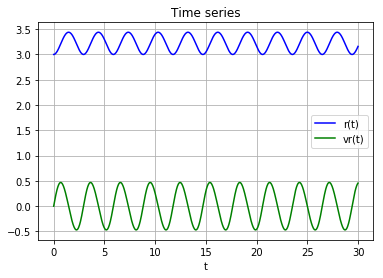

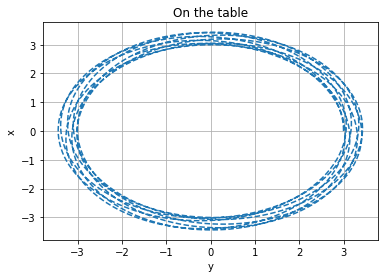

In [24]:
mA = 1
mB = 1
r0 = 3
vr0 = 0
theta0 = 0
omega0 = 2
g = 9.8
L = mA * r0**2 * omega0
print('L = ', L)

t = np.linspace(0, 30, 1000)
y0 = [r0, vr0, theta0]

sol = odeint(dydt, y0, t, args=(L, g, mA, mB))
 
r = sol[:, 0]
vr = sol[:, 1]
theta = sol[:, 2]

plt.close()
plt.title('Time series')
plt.plot(t, r, 'b', label='r(t)')
plt.plot(t, vr, 'g', label='vr(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

plt.close()
plt.title('On the table')
plt.plot(r*np.cos(theta), r*np.sin(theta),"--")
plt.xlabel('y')
plt.ylabel('x')
plt.grid()
plt.show()

In [21]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( -4, 4))
ax.set_ylim((-4, 4))

point, = ax.plot([], [])

# initialization function: plot the background of each frame
def init():
    x0 = r0*np.cos(theta0)
    y0 = r0*np.sin(theta0)
    point.set_data(x0, y0)
    return (point,)

# animation function. This is called sequentially
def animate(i):
    x = r[:i]*np.cos(theta[:i])
    y = r[:i]*np.sin(theta[:i])
    point.set_data(x, y)
    return (point,)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=1000, interval=20, blit=True)

HTML(anim.to_html5_video())

/home/camilo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
/home/camilo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


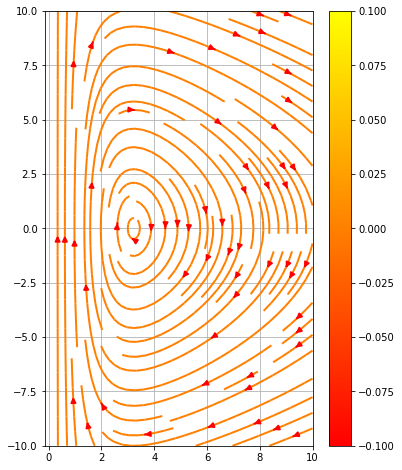

In [46]:
# x = r, y = vr

w = 10
Y, X = np.mgrid[-w:w:100j, 0:w:100j]
Vx = fr(Y)
Vy = fvr(L, g, mA, mB, X)

speed = np.sqrt(Vx*Vx + Vy*Vy)

plt.close()
fig, ax = plt.subplots(figsize=(6,8))
strm = ax.streamplot(X, Y, Vx, Vy, color=speed/speed.max(), linewidth=2, cmap=plt.cm.autumn)
fig.colorbar(strm.lines)
ax.grid()
plt.show()